In [3]:
from IPython import display
!pip install ultralytics

display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.46 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5689.3/8062.4 GB disk)


## Set path folder to match YOLO configuration

In [4]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [5]:
try:
    rm -r /content/datasets
except:
    pass

In [6]:
directory = f'{HOME}/datasets'
if not os.path.exists(directory):
    os.makedirs(directory)
    print('Directory created successfully')
else:
    print('Directory already exists')

Directory created successfully


In [7]:
cd {HOME}/datasets

/kaggle/working/datasets


## Download data

In [8]:
import cv2
import shutil

if os.path.exists('Camel-Data'):
    shutil.rmtree('Camel-Data')
    print(f"Removed existing directory")

!git clone https://github.com/iramamy/Camel-Data.git
print('Repository cloned')

Cloning into 'Camel-Data'...
remote: Enumerating objects: 1110, done.
remote: Counting objects: 100% (1110/1110), done.
remote: Compressing objects: 100% (728/728), done.
remote: Total 1110 (delta 5), reused 1109 (delta 4), pack-reused 0
Receiving objects: 100% (1110/1110), 31.12 MiB | 41.39 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Repository cloned


In [9]:
from ultralytics import YOLO, solutions
from IPython.display import display, Image

requirements: Ultralytics requirement ['shapely>=2.0.0'] not found, attempting AutoUpdate...


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 10.6 MB/s eta 0:00:00 0:00:01
  Attempting uninstall: shapely
    Found existing installation: Shapely 1.8.5.post1
    Uninstalling Shapely-1.8.5.post1:
      Successfully uninstalled Shapely-1.8.5.post1

requirements: AutoUpdate success ✅ 12.4s, installed 1 package: ['shapely>=2.0.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



## Use YOLO nano size

In [10]:
model = YOLO("yolov8n.pt")

100%|██████████| 6.23M/6.23M [00:00<00:00, 77.5MB/s]


## Train the model

In [11]:
model.train(
    data=f"{HOME}/datasets/Camel-Data/config.yaml", 
    epochs=10,
    imgsz=640)

Ultralytics YOLOv8.2.46 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/datasets/Camel-Data/config.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

100%|██████████| 755k/755k [00:00<00:00, 14.8MB/s]
2024-06-29 10:15:04,290	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-06-29 10:15:05,532	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /kaggle/working/datasets/Camel-Data/Train/labels... 381 images, 0 backgrounds, 0 corrupt: 100%|██████████| 381/381 [00:00<00:00, 1238.71it/s]

train: New cache created: /kaggle/working/datasets/Camel-Data/Train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/datasets/Camel-Data/Valid/labels... 110 images, 0 backgrounds, 0 corrupt: 100%|██████████| 110/110 [00:00<00:00, 1182.43it/s]

val: New cache created: /kaggle/working/datasets/Camel-Data/Valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10       2.3G      1.348       2.55      1.765         19        640: 100%|██████████| 24/24 [00:07<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        110        193    0.00455      0.777      0.352      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.21G      1.389      2.145      1.812         22        640: 100%|██████████| 24/24 [00:03<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.44it/s]

                   all        110        193      0.586      0.295      0.316      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.25G      1.485      2.166      1.861         25        640: 100%|██████████| 24/24 [00:03<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.43it/s]

                   all        110        193      0.352      0.342      0.238     0.0853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.21G      1.407       1.94      1.856         17        640: 100%|██████████| 24/24 [00:03<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.16it/s]

                   all        110        193      0.689      0.477      0.573      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.24G      1.459       1.89      1.828         17        640: 100%|██████████| 24/24 [00:03<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.40it/s]

                   all        110        193      0.661      0.518      0.542      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.29G      1.389      1.732      1.784         19        640: 100%|██████████| 24/24 [00:03<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.68it/s]

                   all        110        193      0.644       0.44      0.469      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.24G      1.318      1.633      1.693         14        640: 100%|██████████| 24/24 [00:03<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.59it/s]

                   all        110        193      0.726      0.477       0.54      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.24G      1.308      1.574      1.697         21        640: 100%|██████████| 24/24 [00:03<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.51it/s]

                   all        110        193      0.783      0.627      0.687      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.26G      1.199      1.396      1.584         19        640: 100%|██████████| 24/24 [00:03<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.52it/s]

                   all        110        193      0.836      0.686      0.757      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.26G       1.19      1.369      1.611         18        640: 100%|██████████| 24/24 [00:03<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.43it/s]

                   all        110        193      0.877        0.7      0.784      0.477



10 epochs completed in 0.017 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.46 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]


                   all        110        193      0.877        0.7      0.784      0.477
Speed: 0.2ms preprocess, 2.5ms inference, 0.0ms loss, 12.6ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bc91870a110>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [12]:
!ls {HOME}/datasets/runs/detect/train/

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


F1_curve.png					  results.png
PR_curve.png					  train_batch0.jpg
P_curve.png					  train_batch1.jpg
R_curve.png					  train_batch2.jpg
args.yaml					  val_batch0_labels.jpg
confusion_matrix.png				  val_batch0_pred.jpg
confusion_matrix_normalized.png			  val_batch1_labels.jpg
events.out.tfevents.1719656118.223f953298ff.34.0  val_batch1_pred.jpg
labels.jpg					  val_batch2_labels.jpg
labels_correlogram.jpg				  val_batch2_pred.jpg
results.csv					  weights


/kaggle/working


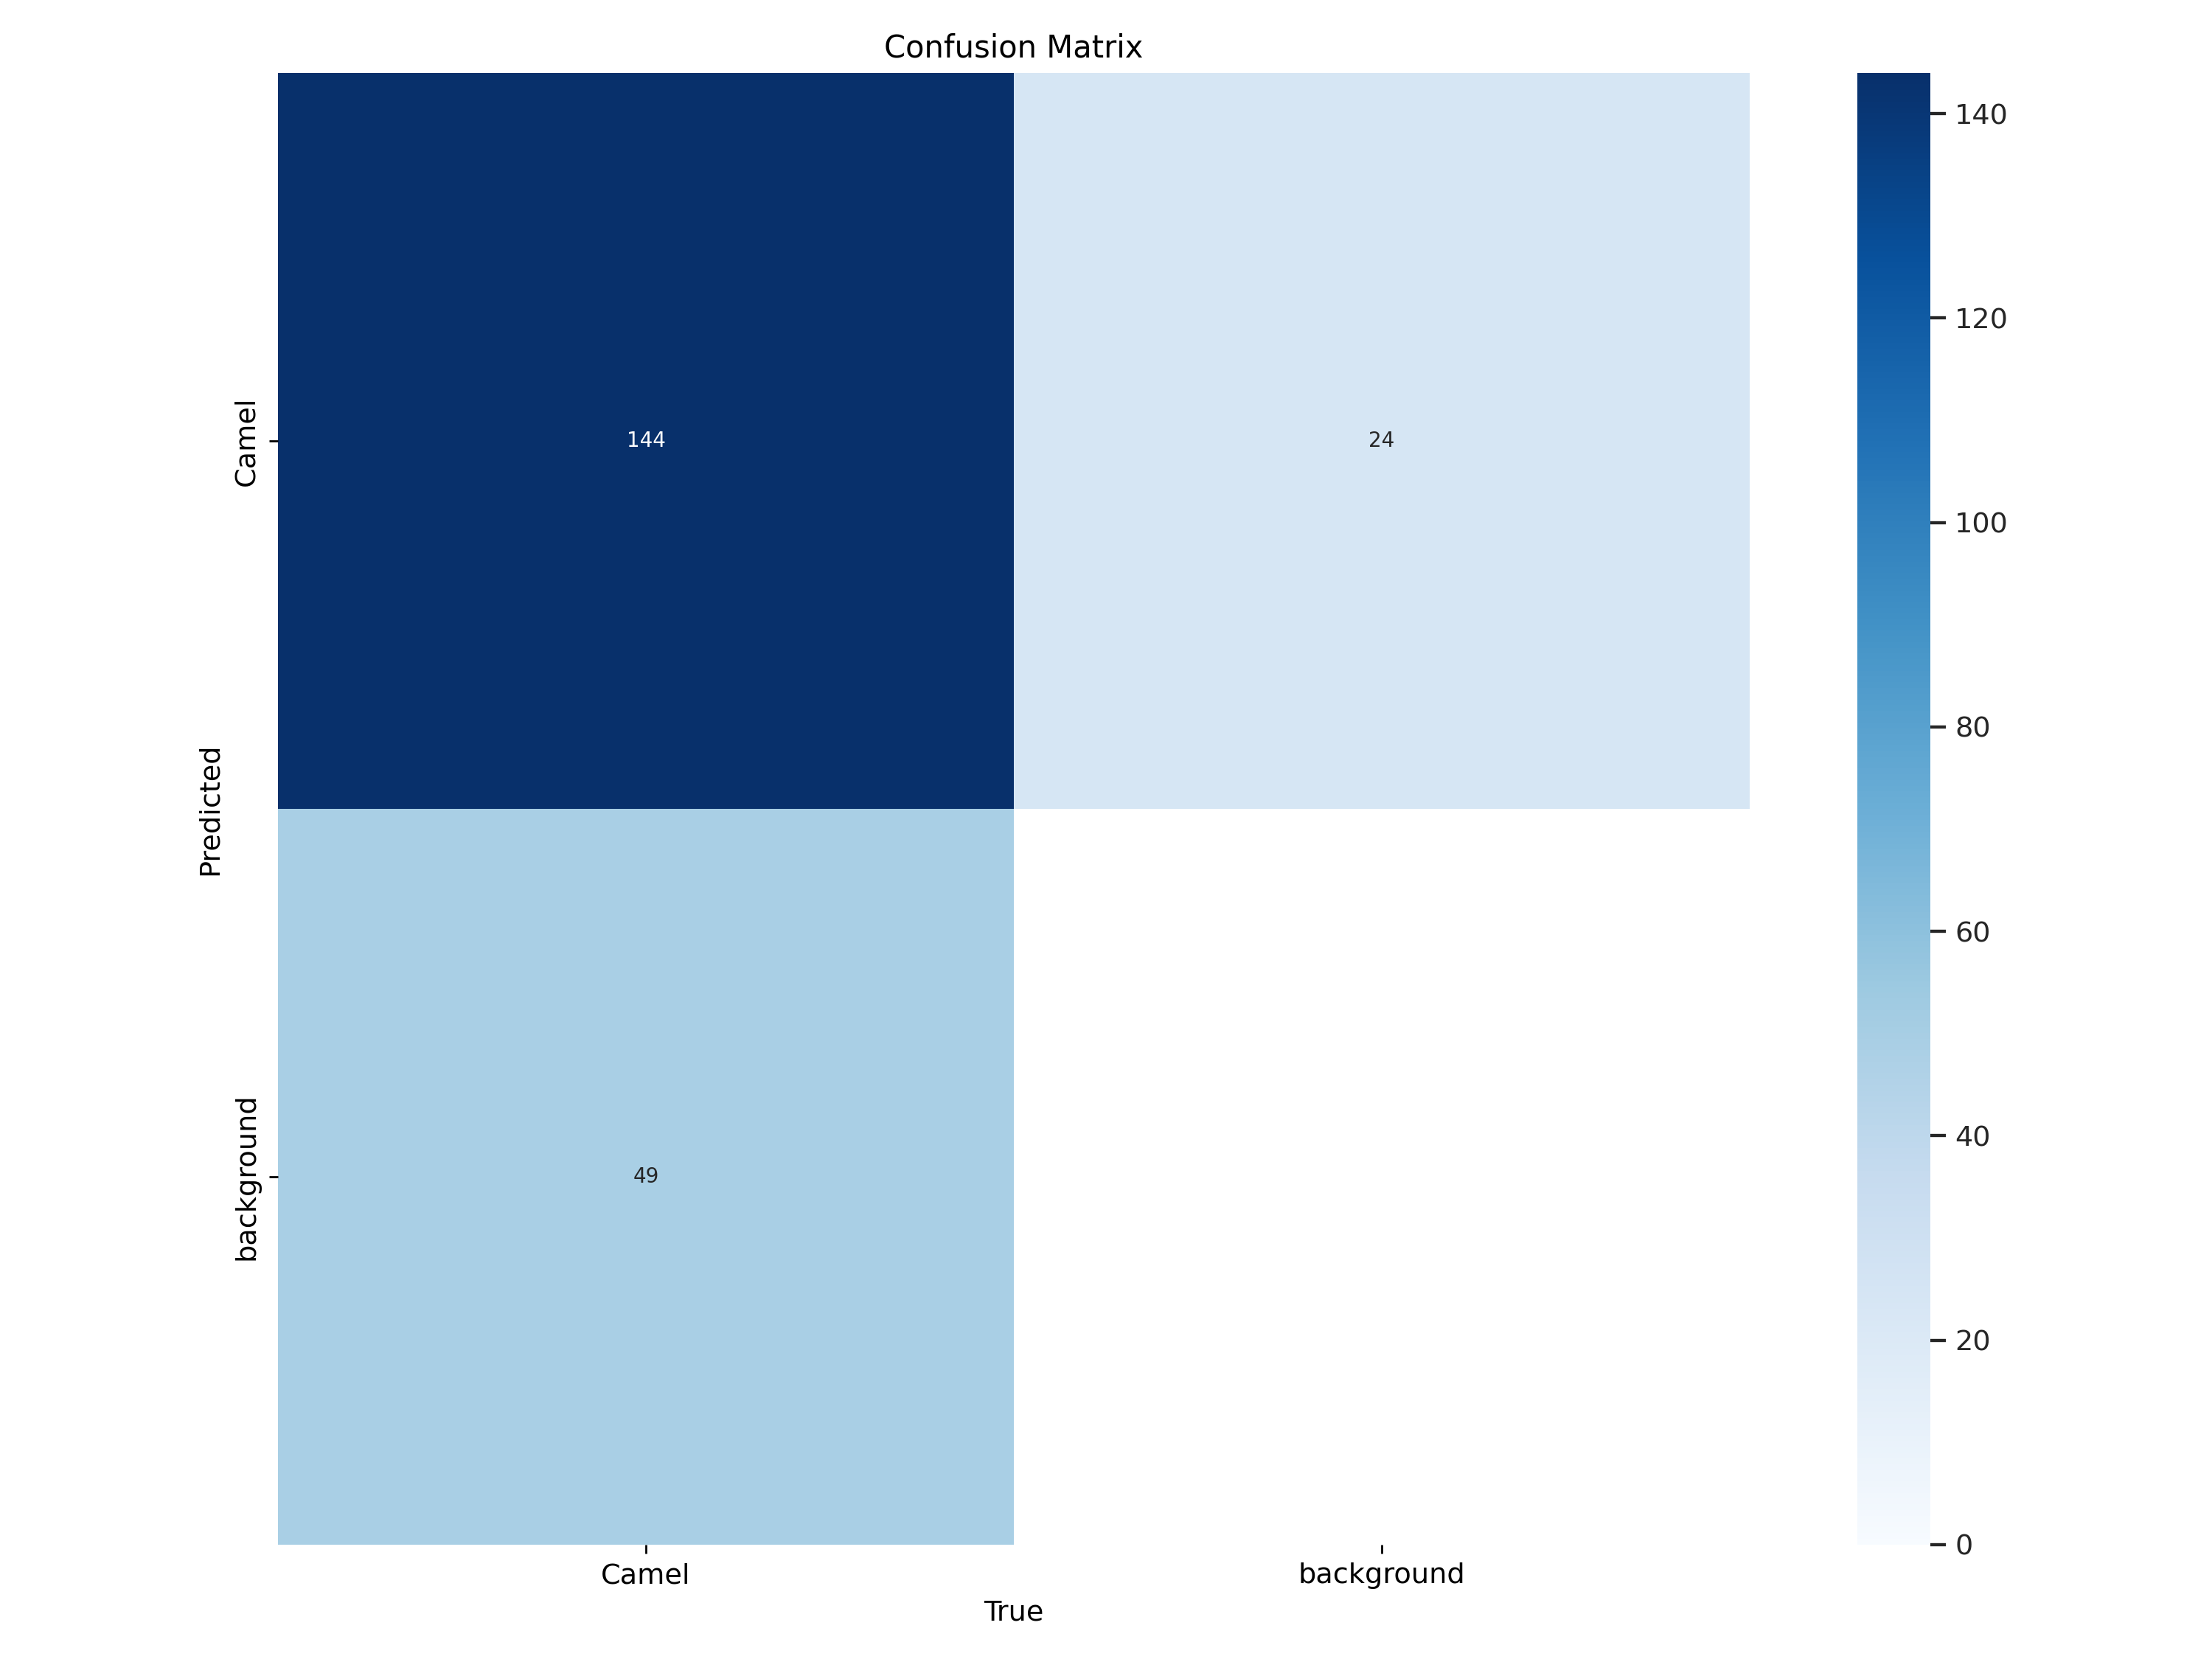

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/runs/detect/train/confusion_matrix.png', width=600)

/kaggle/working


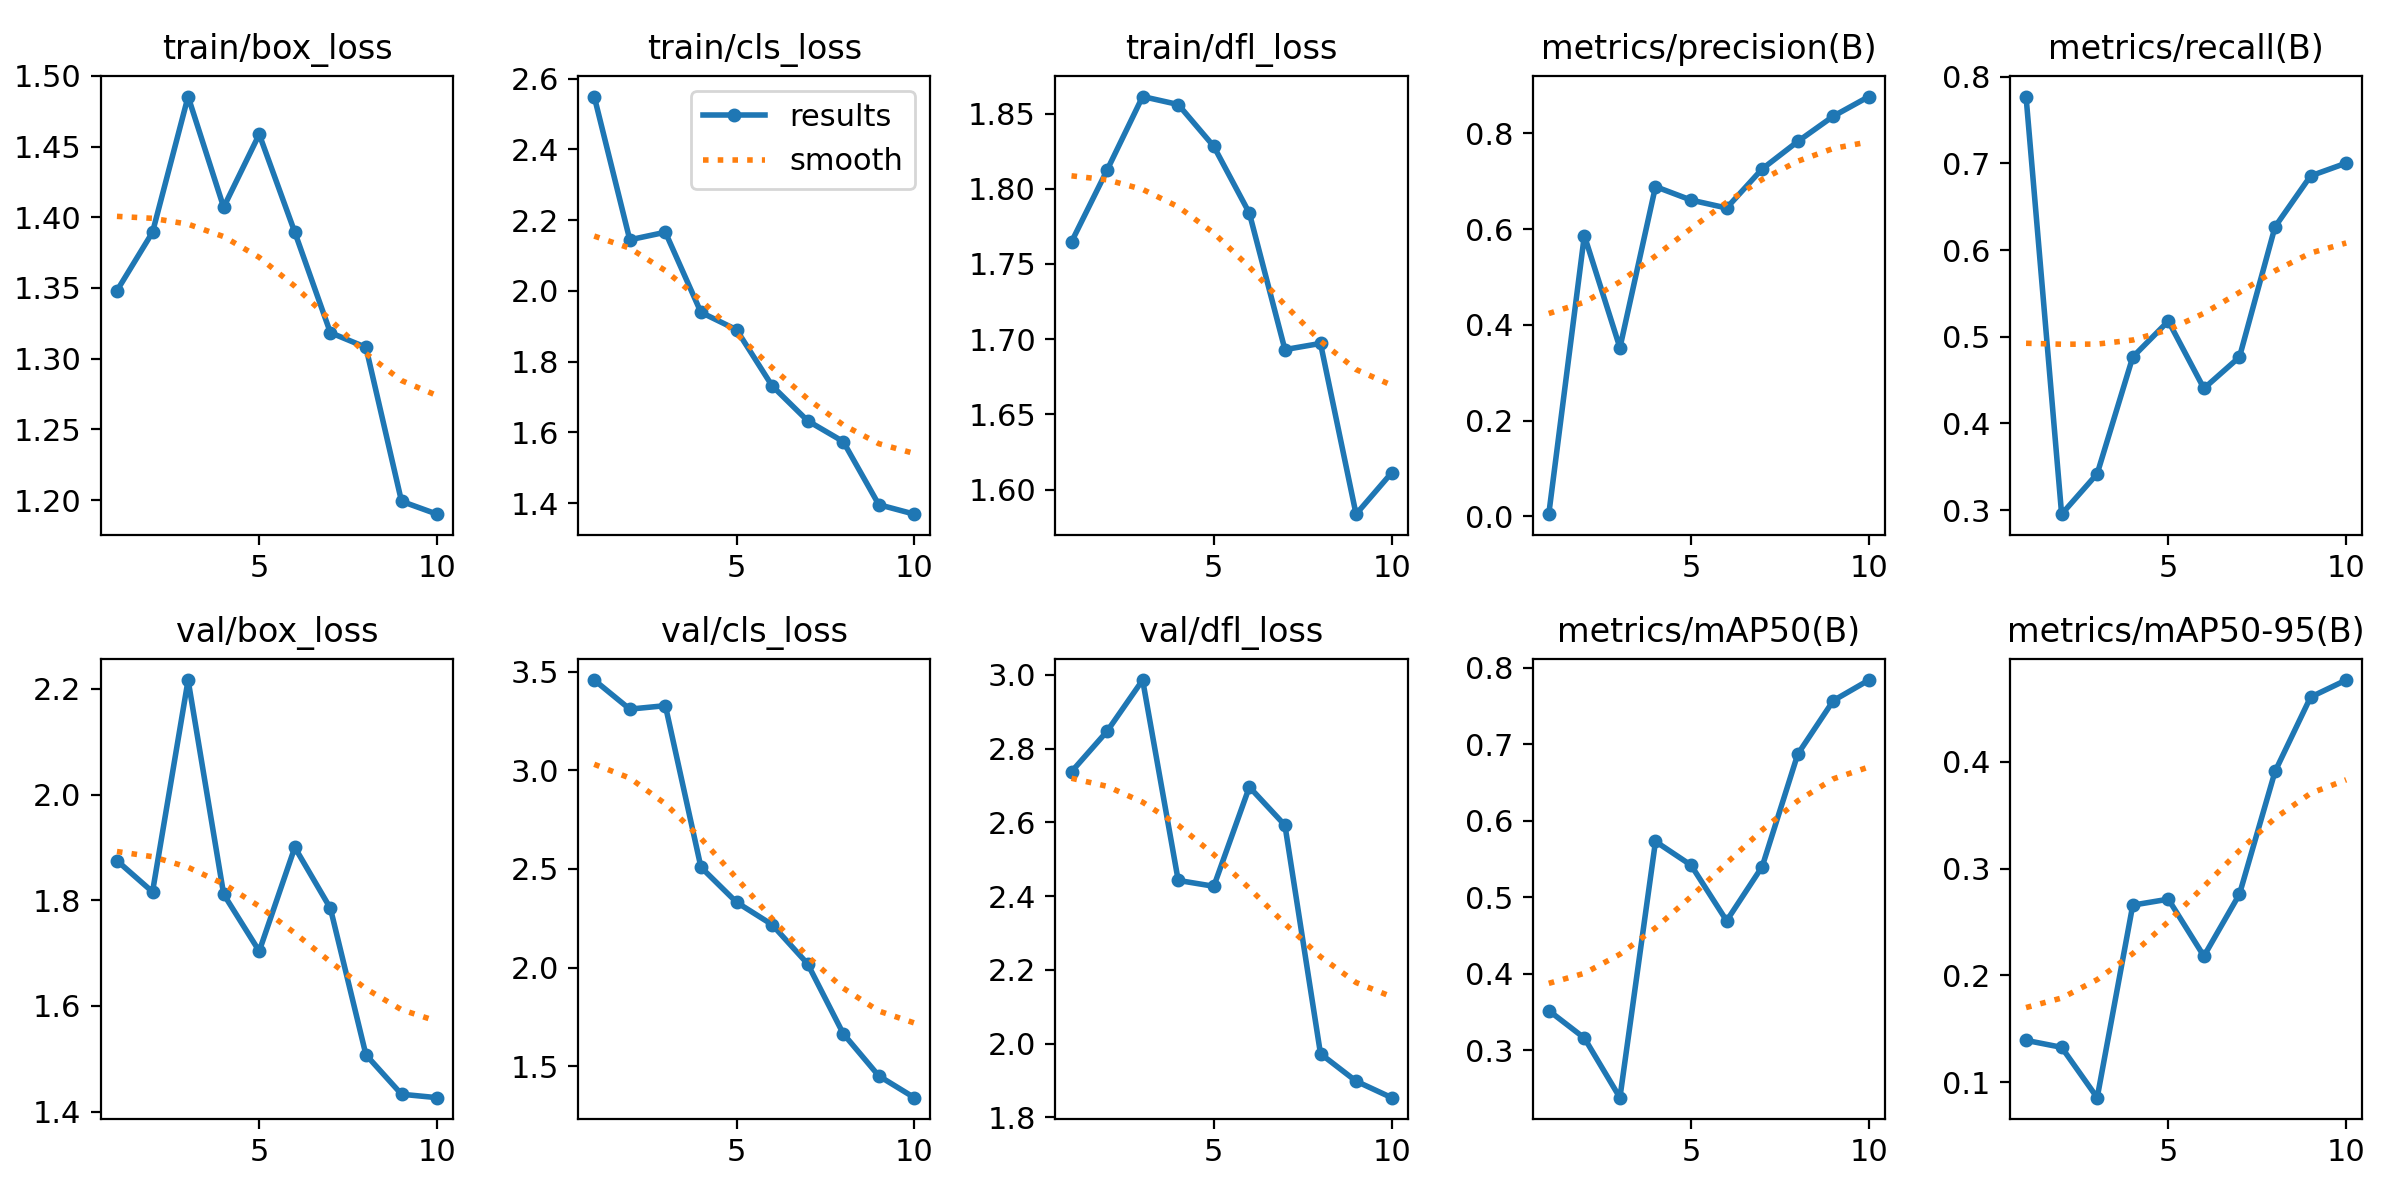

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/runs/detect/train/results.png', width=1600)

In [15]:
%cd {HOME}

val_model = YOLO(f"{HOME}/datasets/runs/detect/train/weights/best.pt")
val_model.val(data=f"{HOME}/datasets/Camel-Data/config.yaml")

/kaggle/working
Ultralytics YOLOv8.2.46 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/working/datasets/Camel-Data/Valid/labels.cache... 110 images, 0 backgrounds, 0 corrupt: 100%|██████████| 110/110 [00:00<?, ?it/s]
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.24it/s]


                   all        110        193      0.877        0.7      0.784      0.476
Speed: 0.2ms preprocess, 5.4ms inference, 0.0ms loss, 10.7ms postprocess per image
Results saved to runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bc9934316f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [16]:
%%capture
%cd {HOME}

pred_model = YOLO(f"{HOME}/datasets/runs/detect/train/weights/best.pt")
pred_model.predict(
    source=f"{HOME}/datasets/Camel-Data/Test/images",
    show_conf=True,
    save=True
)


image 1/55 /kaggle/working/datasets/Camel-Data/Test/images/008T1714HYY8_jpg.rf.94980d5995baf048601023ba5549d2b2.jpg: 640x640 1 Camel, 7.4ms
image 2/55 /kaggle/working/datasets/Camel-Data/Test/images/0Q5RRP3ZDDNU_jpg.rf.c1977ef1bfe8680653d464d70e38714e.jpg: 640x640 3 Camels, 7.3ms
image 3/55 /kaggle/working/datasets/Camel-Data/Test/images/1FZW7Y0LFYL3_jpg.rf.fa3a12e913ec7352104e13ab678c48c5.jpg: 640x640 1 Camel, 7.3ms
image 4/55 /kaggle/working/datasets/Camel-Data/Test/images/2DSW6MJQUF1M_jpg.rf.63561d7afa5949ca20fb53dd9fe2b7be.jpg: 640x640 1 Camel, 7.3ms
image 5/55 /kaggle/working/datasets/Camel-Data/Test/images/2G2EC9SQEAAP_jpg.rf.93ea4a886100b569fbdef69b15ae052f.jpg: 640x640 1 Camel, 7.3ms
image 6/55 /kaggle/working/datasets/Camel-Data/Test/images/2U1P97NZNXDM_jpg.rf.c861927b36e99ac81935d9c4b04c6823.jpg: 640x640 1 Camel, 7.3ms
image 7/55 /kaggle/working/datasets/Camel-Data/Test/images/2W9PH63HJNP2_jpg.rf.44236a83ad5560f6e701f6b93c323851.jpg: 640x640 2 Camels, 7.3ms
image 8/55 /kaggl

## Download inference video

In [17]:
!wget https://assets.mixkit.co/videos/preview/mixkit-camels-walking-in-the-desert-4285-large.mp4 -O camel.mp4

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


--2024-06-29 10:16:51--  https://assets.mixkit.co/videos/preview/mixkit-camels-walking-in-the-desert-4285-large.mp4
Resolving assets.mixkit.co (assets.mixkit.co)... 18.160.143.117, 18.160.143.38, 18.160.143.51, ...
Connecting to assets.mixkit.co (assets.mixkit.co)|18.160.143.117|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5972390 (5.7M) [video/mp4]
Saving to: 'camel.mp4'

camel.mp4           100%[===================>]   5.70M  25.6MB/s    in 0.2s    

2024-06-29 10:16:51 (25.6 MB/s) - 'camel.mp4' saved [5972390/5972390]



In [18]:
cap = cv2.VideoCapture(f"{HOME}/camel.mp4")
assert cap.isOpened(), "Error reading video file"
width, height, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH,
                                       cv2.CAP_PROP_FRAME_HEIGHT,
                                       cv2.CAP_PROP_FPS)
            )

## Draw line in the video frame

In [19]:
line_points = [(width // 2, 0), (width // 2, height)]

## Video output

In [20]:
output_video_name = "camel_counting_output.avi"
video_writer = cv2.VideoWriter(
    output_video_name,
    cv2.VideoWriter_fourcc(*"mp4v"),
    fps,
    (width, height)
)

## Init Object Counter

In [21]:
counter = solutions.ObjectCounter(
    view_img=True,
    reg_pts=line_points,
    classes_names=model.names,
    draw_tracks=True,
    line_thickness=1,
    view_in_counts=False,
    track_thickness=1
)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Line Counter Initiated.


## Track and Count Camel

In [22]:
while cap.isOpened():
    success, im0 = cap.read()
    if not success:
        print("Video frame is empty or video processing has been successfully completed.")
        break
    tracks = model.track(
        im0,
        persist=True,
        iou=0.4,
        verbose=False,
        show=False)

    im0 = counter.start_counting(im0, tracks)
    video_writer.write(im0)

cap.release()
video_writer.release()

requirements: Ultralytics requirement ['lapx>=0.5.2'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.7 MB/s eta 0:00:00a 0:00:01

requirements: AutoUpdate success ✅ 11.9s, installed 1 package: ['lapx>=0.5.2']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

Video frame is empty or video processing has been successfully completed.


## Convert video to mp4

In [23]:
input_video = f"{HOME}/camel_counting_output.avi"
output_video = f"{HOME}/camel_counting_output.mp4"

In [24]:
%%capture
!pip install ffmpeg-python
import ffmpeg
ffmpeg.input(input_video).output(
    output_video,
    vcodec='libx264',
    acodec='aac').global_args('-loglevel', 'error').run()

In [25]:
from IPython import display
display.Video(output_video, embed=True, width=700)

# Data credit:

```
@misc{
    camel-detection_dataset,
    title = { Camel Detection Dataset },
    type = { Open Source Dataset },
    author = { rovrest0gmailcom },
    howpublished = { \url{ https://universe.roboflow.com/rovrest0gmailcom/camel-detection } },
    url = { https://universe.roboflow.com/rovrest0gmailcom/camel-detection },
    journal = { Roboflow Universe },
    publisher = { Roboflow },
    year = { 2023 },
    month = { jan },
    note = { visited on 2024-06-28 },
}

```